<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [130]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



Get the Vertebral Column Data Set

In [104]:

data_2C_arff, meta = arff.loadarff("/Users/Standon/Downloads/column_2C_weka.arff")
df_2C = pd.DataFrame(data_2C_arff)
df_2C["class"] = df_2C["class"].str.decode("utf-8")

print("2C dataset:\n", df_2C.head())


2C dataset:
    pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


In [105]:
print(df_2C['class'].value_counts())

class
Abnormal    210
Normal      100
Name: count, dtype: int64


In [106]:
df_2C["class"] = df_2C['class'].map({'Normal': 0, "Abnormal": 1})
print(df_2C['class'].value_counts())


class
1    210
0    100
Name: count, dtype: int64


In [107]:
print(df_2C.columns)


Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

Text(0.5, 0.98, 'Scatterplots of Vertebral Column Features')

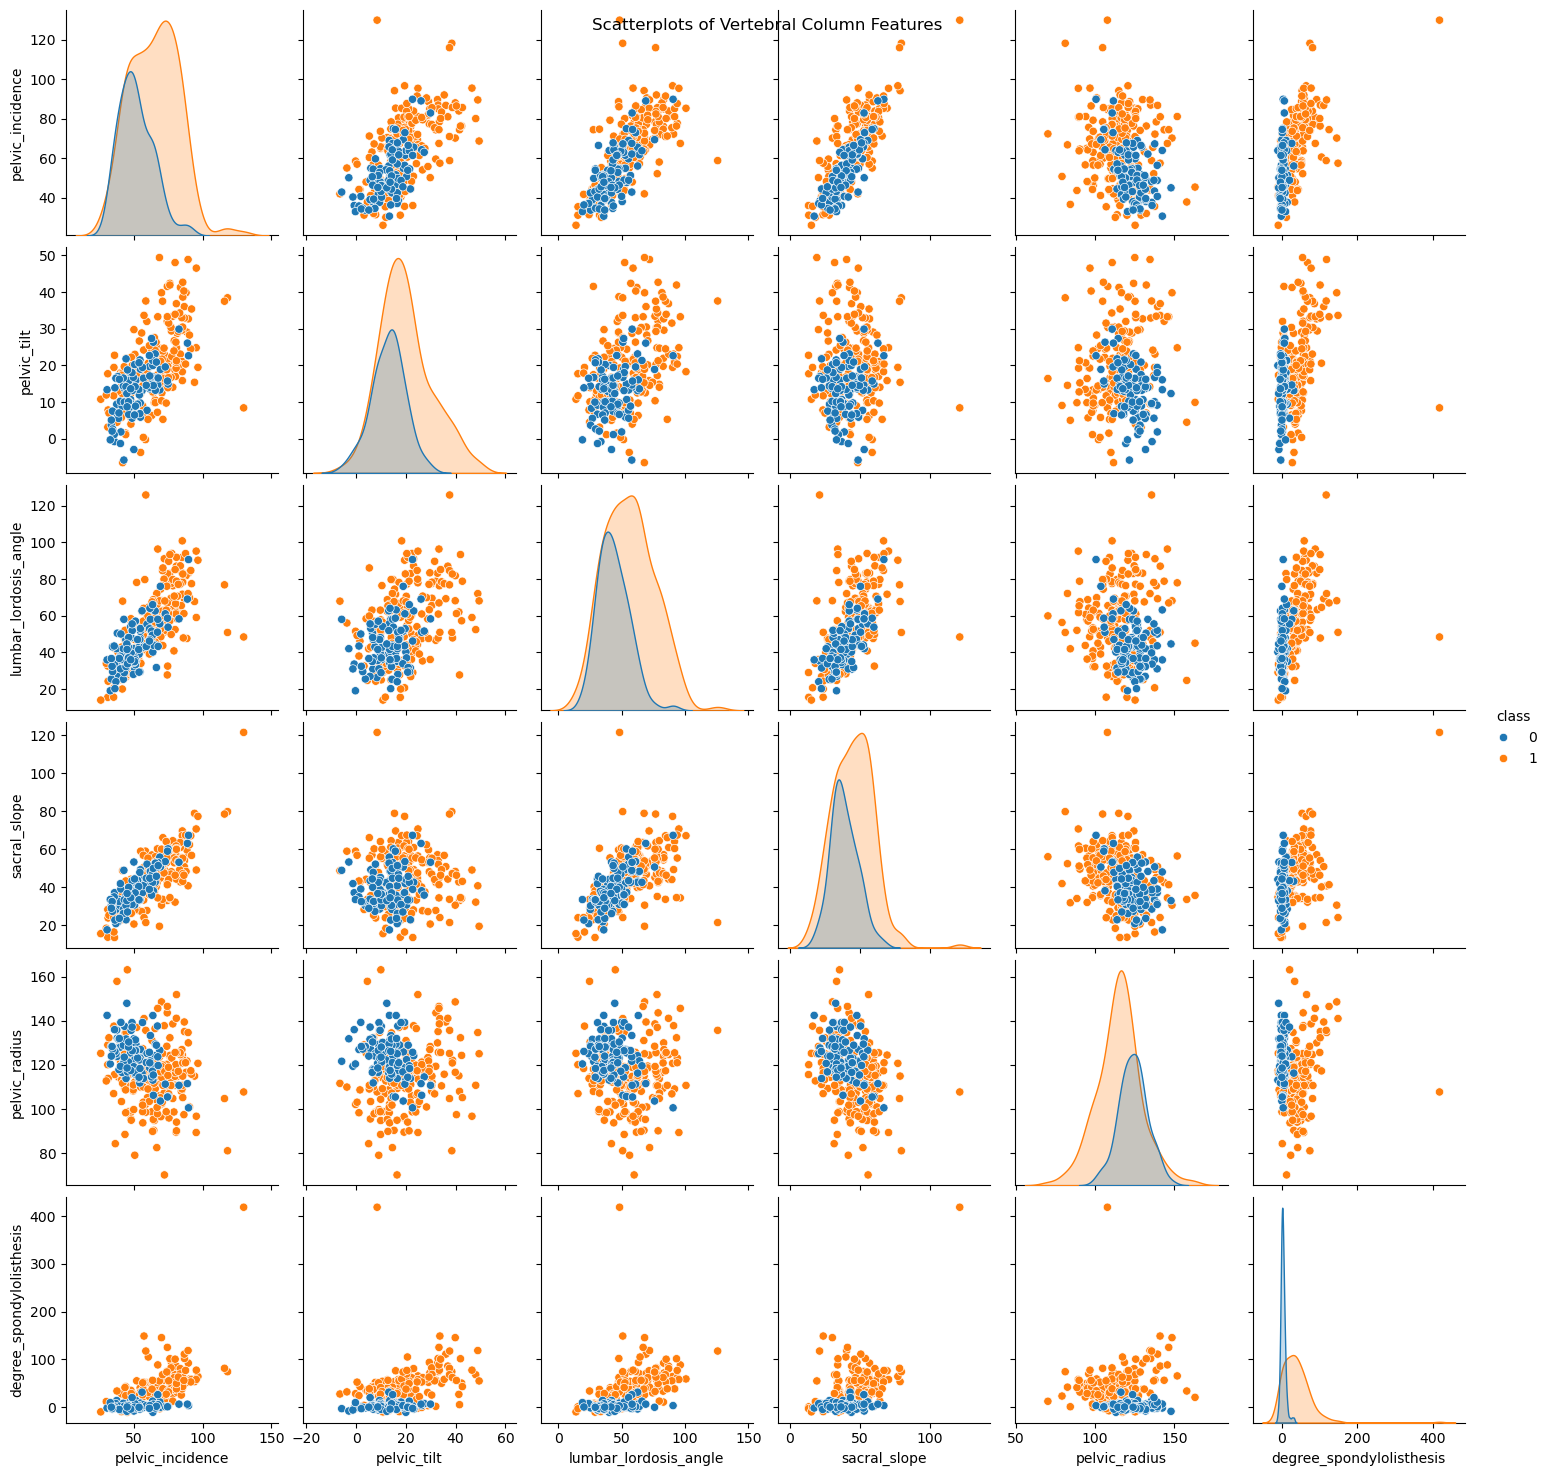

In [108]:
sns.pairplot(df_2C, hue="class")
plt.suptitle("Scatterplots of Vertebral Column Features")

#### ii. Boxplots

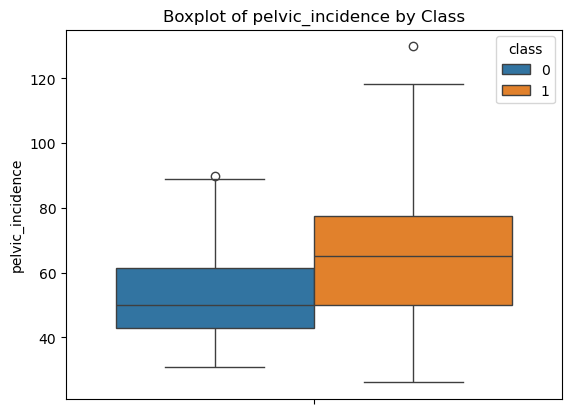

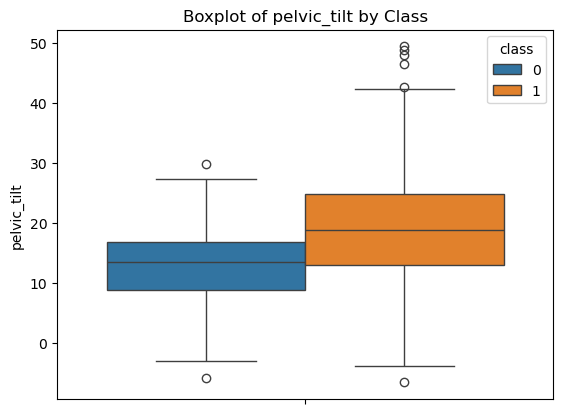

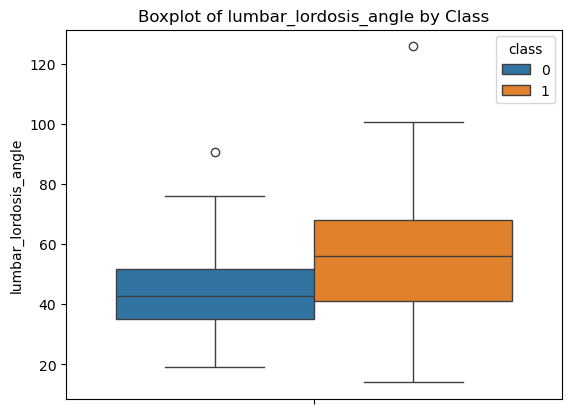

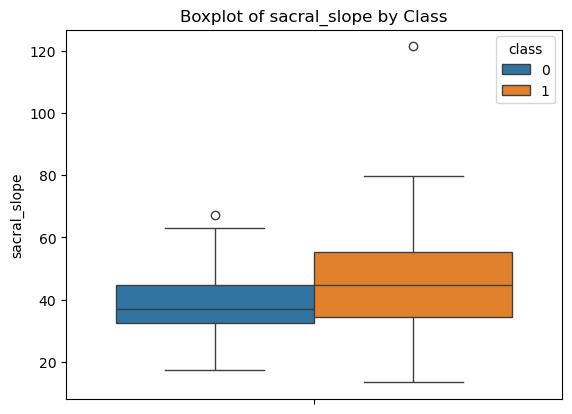

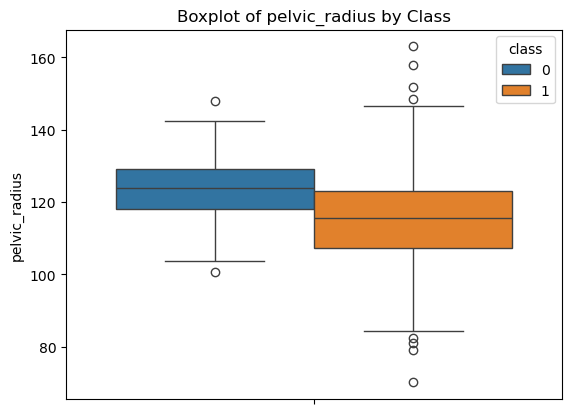

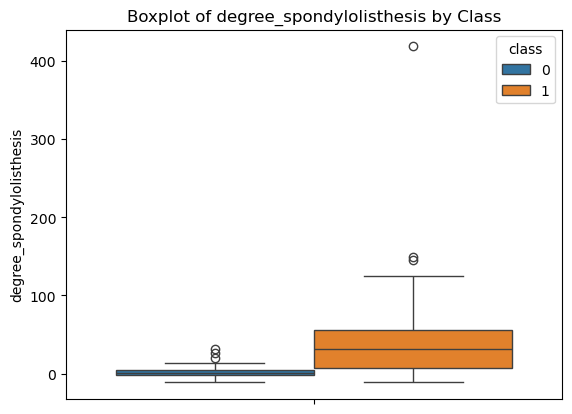

In [109]:
features = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]
for x in features:
    plt.figure()
    sns.boxplot( data=df_2C, y=x, hue = "class")
    plt.title(f"Boxplot of {x} by Class")

#### iii. Split Data Set

In [117]:
class0 = df_2C[df_2C['class'] == 0]
class1 = df_2C[df_2C['class'] == 1]
trainClass0 = class0.iloc[:70]
trainClass1 = class1.iloc[:140]
testClass0 = class0.iloc[70:]
testClass1 = class1.iloc[140:]
train_set = pd.concat([trainClass0, trainClass1])
test_set = pd.concat([testClass0, testClass1])
X_train = train_set[features]
Y_train = train_set['class']
X_test = test_set[features]
Y_test = test_set['class']

### (c) Classification

In [ ]:
# Define k values in reverse order (208 → 1, step -3)
k_values = list(range(208, 0, -3))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)  # Euclidean
    knn.fit(X_train, y_train)

    # Predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Error rates
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)


#### i. Euclidean Metric

In [129]:
EucKNN = KNeighborsClassifier(n_neighbors=3)
EucKNN.fit(X_train, Y_train)
Pred = EucKNN.predict(X_test)
print(confusion_matrix(Y_test, Pred))
print(classification_report(Y_test, Pred))

[[23  7]
 [ 1 69]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.91      0.99      0.95        70

    accuracy                           0.92       100
   macro avg       0.93      0.88      0.90       100
weighted avg       0.92      0.92      0.92       100



#### ii. Test Data

In [ ]:
k_values = list(range(208, 0, -3))  # reverse order, step = -3

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
    knn.fit(X_train, Y_train)

    # Predictions
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Error = 1 - accuracy
    train_errors.append(1 - accuracy_score(Y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(Y_test, y_test_pred))

In [133]:
k_value = list(range(208,0,-3))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    


#### iii. Learning Curve

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

##### C. Chebyshev Distance With p -> infinity.

#### ii. Mahalanobis Distance.

### (e) Weighted Decision

### (f) Training Error Rate